In [74]:
!pip install kmodes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples


In [4]:
data = pd.read_csv('New_York_City_Leading_Causes_of_Death.csv')
df = data.copy()
data.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299,35.1,35.5
1,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840,215.7,268.3
2,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64,5.1,5.4
3,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,152,17.8,18.6
4,2009,All Other Causes,M,Asian and Pacific Islander,220,43.1,56.1


## K-MODES

In [5]:
km = KModes(n_clusters=3).fit(df)

In [6]:
df['kmodes'] = km.labels_
df.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate,kmodes
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299,35.1,35.5,1
1,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840,215.7,268.3,1
2,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64,5.1,5.4,2
3,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,152,17.8,18.6,1
4,2009,All Other Causes,M,Asian and Pacific Islander,220,43.1,56.1,0


In [7]:
df['kmodes'].value_counts()

0    349
1    260
2     99
Name: kmodes, dtype: int64

## Hierarchical Clustering (Agglomerative Clustering)

In [8]:
ag = AgglomerativeClustering(n_clusters=3).fit(df[['Deaths', 'Death Rate', 'Age Adjusted Death Rate']])

In [9]:
df['ag'] = ag.labels_
df.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate,kmodes,ag
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299,35.1,35.5,1,1
1,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840,215.7,268.3,1,0
2,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64,5.1,5.4,2,1
3,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,152,17.8,18.6,1,1
4,2009,All Other Causes,M,Asian and Pacific Islander,220,43.1,56.1,0,1


In [10]:
pivoted = df.groupby('ag')['Deaths', 'Death Rate', 'Age Adjusted Death Rate'].mean().reset_index()

In [11]:
pivoted

,ag,Deaths,Death Rate,Age Adjusted Death Rate
0,0,1784.03200,156.440800,163.817600
1,1,201.40388,21.866138,23.824162
2,2,5097.50000,367.593750,241.612500


[12, 9]


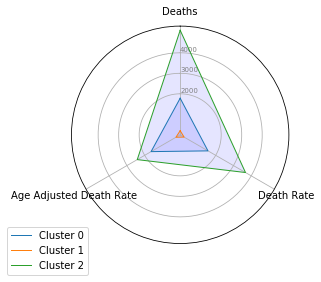

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Set data
df=pivoted.copy()

#df['Year']=df['Year']/90
#df['Deaths']=df['Deaths']/90
df['Death Rate']=df['Death Rate']*10
df['Age Adjusted Death Rate']=df['Age Adjusted Death Rate']*10
# ------- PART 1: Create background

# number of variable
categories=list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([2000,3000,4000], ["2000","3000","4000"], color="grey", size=7)
plt.ylim(0,5300)

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
print(fig_size)
# ------- PART 2: Add plots

# Plot each individual = each line of the data
# Ind1
values=df.loc[0].drop('ag').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=df.loc[1].drop('ag').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 1")
ax.fill(angles, values, 'b', alpha=0.1)

values=df.loc[2].drop('ag').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)


# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [13]:
df['ag'].value_counts()

2    1
1    1
0    1
Name: ag, dtype: int64

### Using SciPy

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
df1 = data.copy()
df1.dtypes

Year                         int64
Leading Cause               object
Sex                         object
Race Ethnicity              object
Deaths                       int64
Death Rate                 float64
Age Adjusted Death Rate    float64
dtype: object

In [16]:
df1['Year'] = df1['Year'].astype('category')
df1['Leading Cause'] = df1['Leading Cause'].astype('category')
df1['Sex'] = df1['Sex'].astype('category')
df1['Race Ethnicity'] = df1['Race Ethnicity'].astype('category')
df1.dtypes

Year                       category
Leading Cause              category
Sex                        category
Race Ethnicity             category
Deaths                        int64
Death Rate                  float64
Age Adjusted Death Rate     float64
dtype: object

In [17]:
df1['eYear'] = df1['Year'].cat.codes
df1['eLeading Cause'] = df1['Leading Cause'].cat.codes
df1['eSex'] = df1['Sex'].cat.codes
df1['eRace Ethnicity'] = df1['Race Ethnicity'].cat.codes

In [18]:
df1.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate,eYear,eLeading Cause,eSex,eRace Ethnicity
0,2010,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,299,35.1,35.5,3,3,1,1
1,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Black Non-Hispanic,1840,215.7,268.3,4,10,1,1
2,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,64,5.1,5.4,7,0,0,2
3,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,152,17.8,18.6,5,0,1,1
4,2009,All Other Causes,M,Asian and Pacific Islander,220,43.1,56.1,2,1,1,0


In [19]:
df_final = df1[['eYear', 'eLeading Cause', 'eSex', 'eRace Ethnicity', 'Deaths', 'Death Rate', 'Age Adjusted Death Rate']]

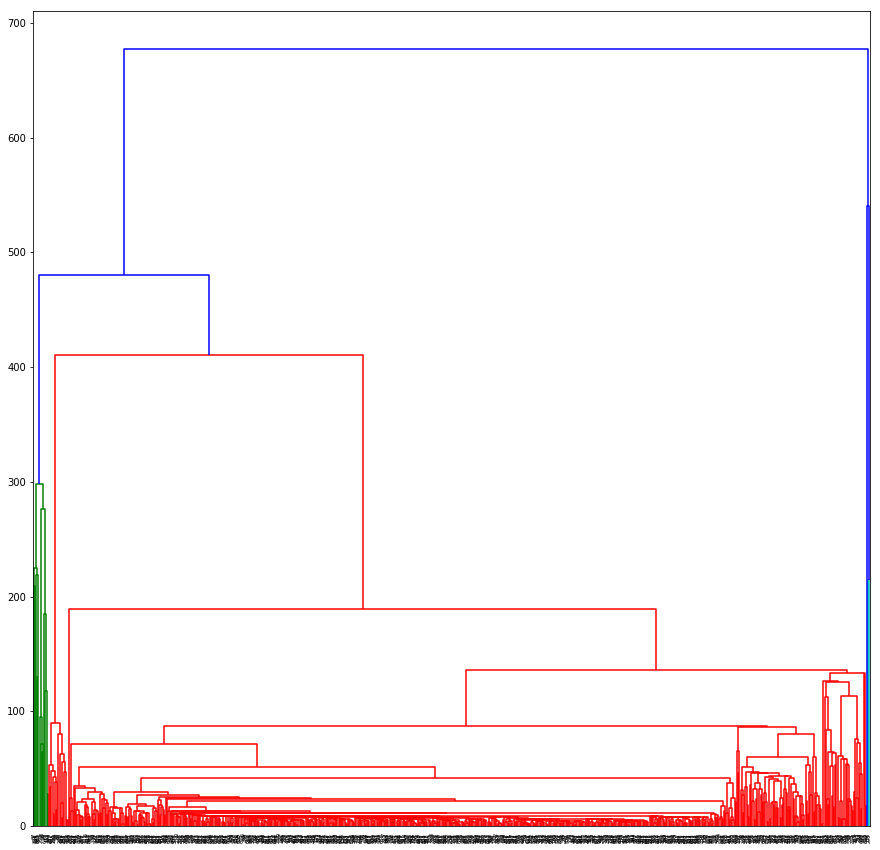

In [20]:
Z = linkage(df_final)
plt.figure(figsize=(15,15));
dendrogram(Z);
plt.show()

## Choosing number of clusters

### Avg. Silhouette Method

For 2 clusters, silhouette average is 0.327244196158595.


AttributeError: module 'matplotlib.cm' has no attribute 'spectral'

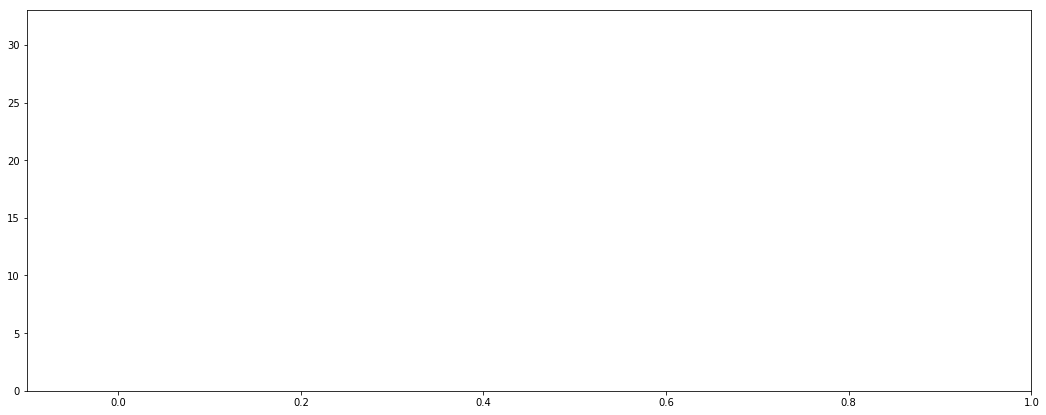

In [21]:
d = df[['Deaths', 'Death Rate', 'Age Adjusted Death Rate']]
for i in range(2,15):
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(d) + (i + 1) * 10])
    
    k = KMeans(n_clusters=i).fit(d)
    labels = k.labels_
    sil = silhouette_score(d, labels)
    print('For {} clusters, silhouette average is {}.'.format(i, sil))
    sample_sils = silhouette_samples(d, labels)
    y_lower = 10
    for j in range(i):
        jc_sil_values = sample_sils[labels == j]
        jc_sil_values.sort()
        size_cluster_j = jc_sil_values.shape[0]
        y_upper = y_lower + size_cluster_j
        
        color = cm.spectral(float(j) / i)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, jc_sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10
    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=sil, color="red", linestyle="--")
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()